## Dimensionality reduction using automatic mathematical constructs, followed by clustering of the embeddings of multi-dimensional signal data in novel "reduced dimensional" feature spaces

In [1]:
#import various useful packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
import pandas as pd
%matplotlib inline

#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
# import umap

#importing clustering packages
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# /content/gdrive/MyDrive/2390--Spring2022/2390--Spring2022/Week05/spike_data.csv
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/2390--Spring2022/2390--Spring2022/Week05/spike_data.csv", header=None)
print(df.shape)
df.head()

(3636, 34)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1687.40,1697.70,1085.0,792.40,1274.50,527.26,-4827.7,-15553.0,-27374.0,-33711.0,-31307.0,-22845.0,-13887.00,-7823.0,-4154.6,-886.4,2765.5,6331.0,9581.9,12892.0,16214.0,18643.0,19411.0,18809.0,17661.0,16239.0,14269.0,11916.0,10035.0,9098.8,8325.90,6416.30,3121.00,-353.94
1,-518.44,-227.55,-1056.1,-1818.80,-1486.20,-1840.20,-6738.2,-17663.0,-30531.0,-38216.0,-36715.0,-28351.0,-18759.00,-11511.0,-6346.7,-1823.1,2012.6,4231.6,5189.4,6676.2,9799.9,13636.0,16433.0,17579.0,17821.0,17867.0,17582.0,16649.0,15344.0,14182.0,13126.00,11704.00,9837.50,8074.00
2,372.62,-545.55,-1721.7,-2910.60,-3609.20,-3838.30,-4207.1,-5112.2,-6163.2,-6635.3,-6360.4,-5906.4,-5855.90,-6124.6,-6121.7,-5468.2,-4399.7,-3486.5,-3102.5,-3208.9,-3531.4,-3825.2,-3989.7,-4043.7,-4047.5,-4007.8,-3810.6,-3281.6,-2386.5,-1380.9,-684.59,-517.98,-655.99,-604.69
3,182.17,-357.40,-1115.5,-1196.30,-1233.00,-4198.00,-12708.0,-25130.0,-35357.0,-37512.0,-30994.0,-20502.0,-11332.00,-5283.9,-1040.9,2776.2,6074.6,8419.5,10294.0,12500.0,14849.0,16251.0,16069.0,14809.0,13373.0,12099.0,10839.0,9600.7,8615.3,7861.6,6967.00,5724.70,4409.60,3385.00
4,2857.90,2945.90,2132.3,796.86,-469.78,-1601.30,-3132.4,-5342.9,-7465.9,-8074.7,-6421.9,-3291.0,-362.35,1272.3,1891.4,2500.4,3617.3,4837.9,5496.0,5475.9,5214.5,5037.0,4771.3,4126.3,3261.4,2721.9,2783.5,3068.3,2963.1,2322.3,1579.50,1189.70,1174.70,1294.30


(3636, 34)


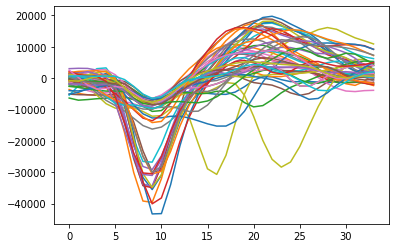

In [4]:
spike_data = df.to_numpy()
print(np.shape(spike_data))

# Create a random list of 50 signals out of the 3636 recordings and then plot these over time (column axis)
listRand = []
for i in range(50):
  listRand.append(random.randint(0,np.shape(spike_data)[0]))

plt.plot( spike_data[listRand,:].T)

plt.show()

## TSNE based visualization of separability of classes / STRUCTURE in the data 

In [5]:
#Initializing the TSNE object. n_components is the dimensionality of the embedding 
#and perplexity is, well, the perplexity (i.e., an effective number of neighbors).
#For the method you can choose either 'exact' or 'barnes-hut'. Barnes-Hut is faster, 
#but less accurate
tsne_example = TSNE(n_components=2,perplexity=10,method='exact') 

#Fits the model and returns back the low-dimensional projections
Y = tsne_example.fit_transform(spike_data[listRand,:])

#To return the embedded points
Y2 = tsne_example.embedding_

#Returns back the LLE error (the cost function value at the found minimum)
tsne_error = tsne_example.kl_divergence_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [6]:
Y2.shape

(50, 2)

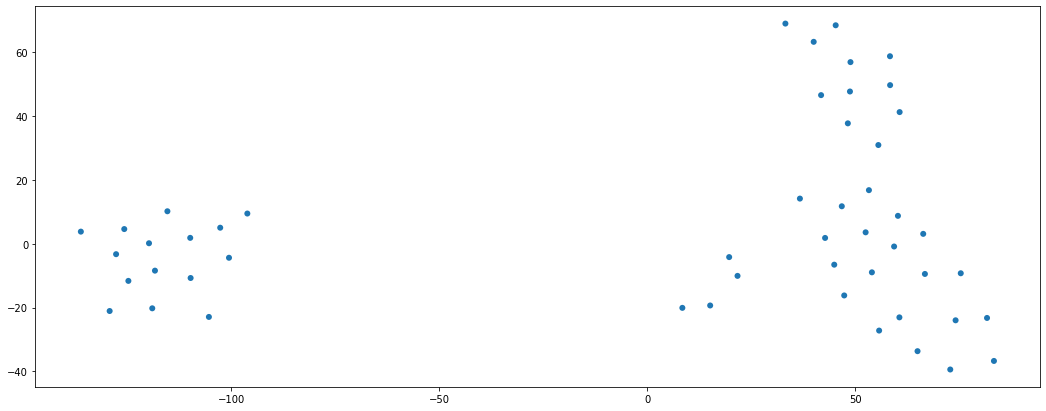

In [7]:
fig = plt.figure(figsize=(18,7))
# plt.subplot(1,2,1)

plt.scatter(Y2[:,0],Y2[:,1],edgecolor="none")  

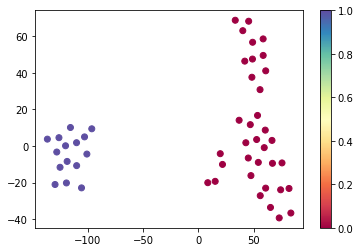

In [8]:
k = 2

km_example = KMeans(n_clusters=k)
km_example.fit(Y2)
km_labels = km_example.predict(Y2)

#To plot:
plt.scatter(Y2[:,0],Y2[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

## PCA based linear mapping and dimensionality reduction to match the "VARIANCE" in the data without paying heed to any structure that may be known beforehand



In [9]:
#To initialize a PCA class instance
k = 5
pca_example = PCA(n_components=k) #Note: Use pca_example = PCA(n_components=m) to only compute for the largest m eigenmodes 

X = spike_data[listRand,:]

#To apply PCA to a data set
pca_example.fit(X)

#To return back it's projections onto the eigenvectors
projections = pca_example.transform(X)

# #To apply PCA to a data set and simultaneously return back it's projections onto the eigenvectors
# projections = pca_example.fit_transform(X)

#The (sorted from largest to smallest) eigenvalues are in the class variable:
example_pca_eigenvalues = pca_example.explained_variance_

#The fraction of the variance explained by each modes is given by:
example_pca_relative_variance = pca_example.explained_variance_ratio_

In [10]:
projections.shape

(50, 5)

Text(0.5, 1.0, 'PCA')

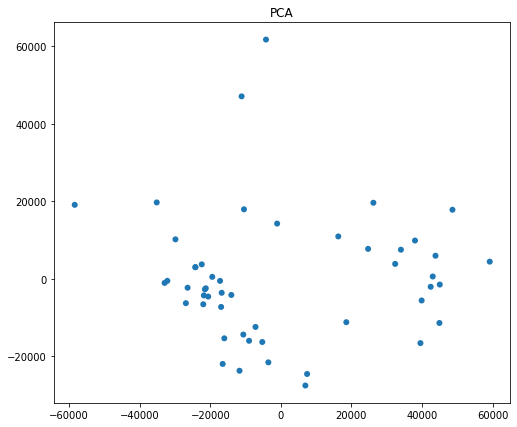

In [11]:
##PCA
fig = plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.scatter(projections[:,0],projections[:,1],edgecolor="none") 
plt.title("PCA")


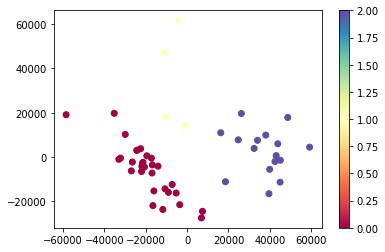

In [12]:
k = 3

km_example = KMeans(n_clusters=k)
km_example.fit(projections)
km_labels = km_example.predict(projections)

#To plot:
plt.scatter(projections[:,0],projections[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

## Lets make a decision tree that LEARNs what the kMeans cluster assignments are, so we can learn / understand the rules that went into this classification exercise. 

In [13]:
# Lets create a training set based on the projections AND the km_labels 
import pandas as pd

trainingDF = pd.DataFrame({'Projection_0':projections[:,0], 'Projection_1':projections[:,1],'KMeansClass':km_labels })
trainingDF['KMeansClass'] = trainingDF['KMeansClass'].astype('category')
print(trainingDF.info())

trainingDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Projection_0  50 non-null     float64 
 1   Projection_1  50 non-null     float64 
 2   KMeansClass   50 non-null     category
dtypes: category(1), float64(2)
memory usage: 1.1 KB
None


,Projection_0,Projection_1,KMeansClass
0,-29883.023463,10187.269351,0
1,-11721.159429,-23735.700830,0
2,-24227.708420,3001.760463,0
3,-16035.612825,-15368.097060,0
4,-20600.438774,-4586.111978,0


In [14]:
trainingDF.KMeansClass.value_counts()

0    30
2    16
1     4
Name: KMeansClass, dtype: int64

In [15]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 1.0 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.3-py3-none-any.whl size=67113 sha256=efe3872964b1c45fc4d23e04769531feb29a6088a23f964ee2c454a0ace41d59
  Stored in directory: /root/.cache/pip/wheels/58/9d/65/e57deb90bf5440945d74bc4c19ebb14a0de2ed2b508c609673
Successfully built dtreeviz


In [16]:
# !pip install dtreeviz
import matplotlib.pyplot as plt
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn import tree

from io import StringIO
from ipywidgets import Image
from dtreeviz.trees import *

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

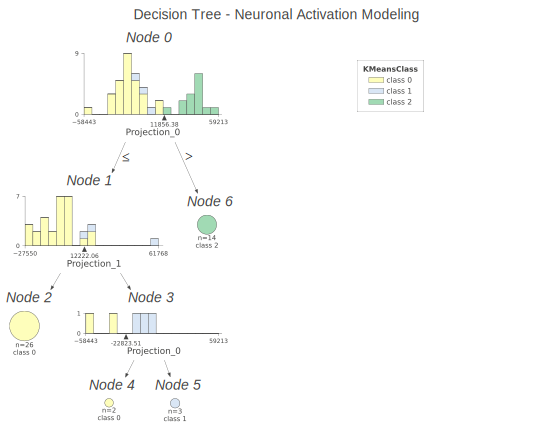

In [17]:
# prepare the data
X=trainingDF.drop(['KMeansClass'],axis=1)
y=trainingDF['KMeansClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# fir the regressor
classifier = tree.DecisionTreeClassifier(max_depth=50, random_state=42)
classifier.fit(X_train, y_train)

# plot the tree
viz = dtreeviz(classifier,
               x_data=X_train,
               y_data=y_train,
               target_name='KMeansClass',
               feature_names=X.columns.to_list(),
               title="Decision Tree - Neuronal Activation Modeling",
               show_node_labels = True)
viz

In [18]:
y_pred=classifier.predict(X_test)
compare=pd.DataFrame({'y_true':y_test})
compare['y_pred']=y_pred
compare=compare.reset_index()
pd.crosstab(compare['y_true'], compare['y_pred'])

y_pred,0,1,2
y_true,,,
0,2,0,0
1,0,1,0
2,0,0,2


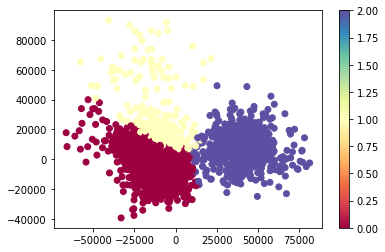

In [19]:
projections_ALLdata =  pca_example.transform(spike_data) 

km_labels = km_example.predict(projections_ALLdata)

#To plot:
plt.scatter(projections_ALLdata[:,0],projections_ALLdata[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

In [20]:
y_pred=classifier.predict(projections_ALLdata[:,:2])
compare=pd.DataFrame({'y_true':km_labels})
compare['y_pred']=y_pred
compare=compare.reset_index()
pd.crosstab(compare['y_true'], compare['y_pred'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


y_pred,0,1,2
y_true,,,
0,2258,16,2
1,81,231,6
2,3,0,1039


## Non-linear clustering with other methods for dimensionality reduction 

In [21]:
!pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=ad0afc1a5a2be4e96836a744ef030039440982b0da0a8318454ebbd0b7c7e0fa
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Text(0.5, 1.0, 'PCA')

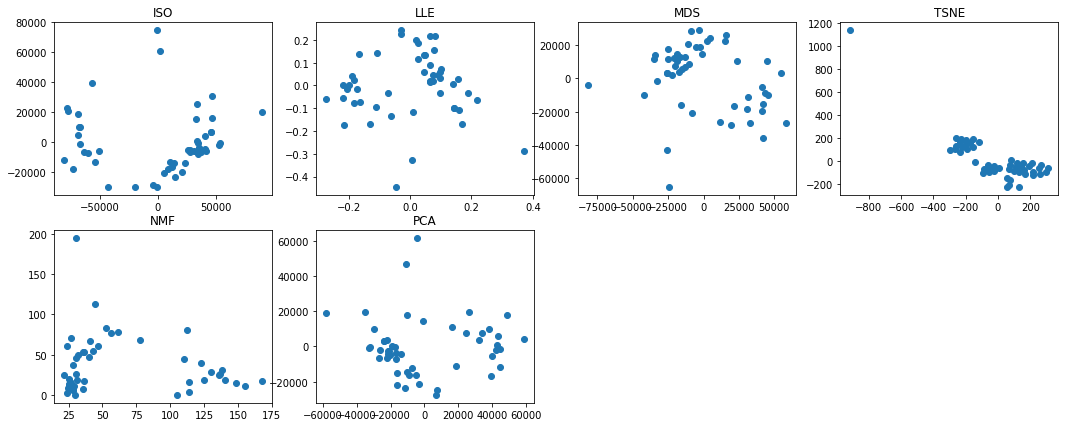

In [22]:
#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
# import umap

fig = plt.figure(figsize=(18,7))

##Isomap
plt.subplot(2,4,1)
digit_isomap = Isomap(n_components=2,n_neighbors=10) 
projections_iso = digit_isomap.fit_transform(spike_data[listRand,:])
plt.scatter(projections_iso[:,0],projections_iso[:,1])
plt.title('ISO')

##LLE
plt.subplot(2,4,2)
digit_LLE = LocallyLinearEmbedding(n_components=2,n_neighbors=20) 
projections_lle = digit_LLE.fit_transform(spike_data[listRand,:])
plt.scatter(projections_lle[:,0],projections_lle[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('LLE')

##MDS
plt.subplot(2,4,3)
digit_mds = MDS(n_components=2) 
projections_mds = digit_mds.fit_transform(spike_data[listRand,:])
plt.scatter(projections_mds[:,0],projections_mds[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('MDS')


#T-SNE
plt.subplot(2,4,4)
digit_tsne = TSNE(n_components=2,perplexity=10,method='exact') 
tsne_projections = digit_tsne.fit_transform(spike_data[listRand,:])
plt.scatter(tsne_projections[:,0],tsne_projections[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('TSNE')

##NMF
plt.subplot(2,4,5)
digit_nmf = NMF(n_components=2) 
projections_nmf = digit_nmf.fit_transform(np.abs(spike_data[listRand,:]))
plt.scatter(projections_nmf[:,0],projections_nmf[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('NMF')

##PCA
plt.subplot(2,4,6)
digit_pca = PCA(n_components=2) 
projections_pca = digit_pca.fit_transform(spike_data[listRand,:])
plt.scatter(projections_pca[:,0],projections_pca[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('PCA')

# ##Umap
# digit_umap = umap.UMAP(n_components=2,n_neighbors=40,min_dist=.05) 
# projections_umap = digit_umap.fit_transform(spike_data[listRand,:])
# plt.scatter(projections_umap[:,0],projections_umap[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
# plt.title('UMAP')
# plt.subplot(2,4,7)

## Since new Embeddings Cannot be recreated for new data (i.e. out-of-sample extension is not possible) for non-linear methods of projection, despite their usefulness to show structure in the data in a training sample, lets think of a novel method to "LEARN" these embeddings and predict them for new data 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'TSNE')

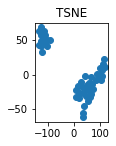

In [23]:
#T-SNE
plt.subplot(2,4,4)
digit_tsne = TSNE(n_components=2,perplexity=10,method='exact') 

tsne_projections = digit_tsne.fit_transform(spike_data[listRand,:])
plt.scatter(tsne_projections[:,0],tsne_projections[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('TSNE')



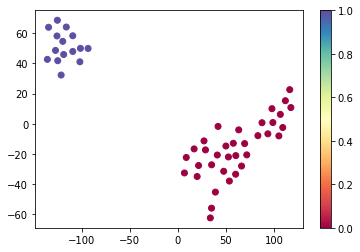

In [24]:
k = 2

km_example = KMeans(n_clusters=k)
km_example.fit(tsne_projections)
km_labels = km_example.predict(tsne_projections)

#To plot:
plt.scatter(tsne_projections[:,0],tsne_projections[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

In [25]:
# Lets create  regression model to predict  tsne_projections[:,0]
# prepare the data
X=trainingDF.drop(['KMeansClass'],axis=1)  #Lets use the PCA embeddings to Predict the TSNE embeddings
y=tsne_projections[:,0]

# fir the regressor
regressor0 = tree.DecisionTreeRegressor()
regressor0.fit(X, y)

DecisionTreeRegressor()

In [26]:
# Lets create  regression model to predict  tsne_projections[:,1]
# prepare the data
X=trainingDF.drop(['KMeansClass'],axis=1)
y=tsne_projections[:,1]

# fir the regressor
regressor1 = tree.DecisionTreeRegressor()
regressor1.fit(X, y)

DecisionTreeRegressor()

In [27]:
# Apply the regresion models to new data to predict the projection and then plot it with cluster color assignments based on a KMeans clustering model (i.e. km_example) which was fit to the training set alone.
tsne_projections_Predict0 = regressor0.predict(X)
tsne_projections_Predict1 = regressor1.predict(X)

tsne_projections_Predicts = pd.DataFrame({'Projection0':tsne_projections_Predict0, 'Projection1':tsne_projections_Predict1})
tsne_projections_Predicts.head()

,Projection0,Projection1
0,17.069469,-16.663118
1,98.955597,0.794984
2,28.121847,-14.336699
3,83.396317,-7.890445
4,57.816963,-12.926661


In [28]:
tsne_projections_Actuals = pd.DataFrame({'Projection0':tsne_projections[:,0], 'Projection1':tsne_projections[:,1]})
tsne_projections_Actuals.head()

,Projection0,Projection1
0,17.069469,-16.663118
1,98.955597,0.794984
2,27.366392,-11.356146
3,83.396317,-7.890445
4,57.816963,-12.926661


In [29]:
tsne_projections_Predicts_ARRAY = tsne_projections_Predicts.to_numpy()
# tsne_projections_Predicts_ARRAY

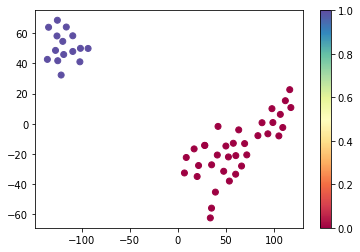

In [30]:
km_labels_predicted = km_example.predict(tsne_projections_Predicts_ARRAY.astype('float32'))

#To plot:
plt.scatter(tsne_projections_Predicts_ARRAY[:,0],tsne_projections_Predicts_ARRAY[:,1],c=km_labels_predicted,cmap='Spectral');plt.colorbar();plt.show()

In [31]:
# Apply the regresion models to new data to predict the projection and then plot it with cluster color assignments based on a KMeans clustering model (i.e. km_example) which was fit to the training set alone.
tsne_projections_Predict0 = regressor0.predict(projections_ALLdata[:,:2])
tsne_projections_Predict1 = regressor1.predict(projections_ALLdata[:,:2])

tsne_projections_Predicts = pd.DataFrame({'Projection0':tsne_projections_Predict0, 'Projection1':tsne_projections_Predict1})
tsne_projections_Predicts.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


,Projection0,Projection1
0,-125.522797,58.258259
1,-125.110359,68.546593
2,8.894609,-34.945038
3,-118.531525,54.558048
4,69.582634,-12.926661


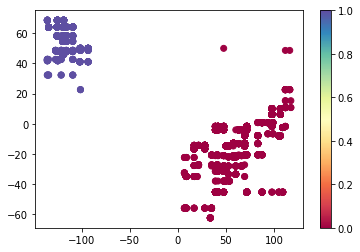

In [32]:
tsne_projections_Predicts_ARRAY = tsne_projections_Predicts.to_numpy()
km_labels_predicted = km_example.predict(tsne_projections_Predicts_ARRAY.astype('float32'))

#To plot:
plt.scatter(tsne_projections_Predicts_ARRAY[:,0],tsne_projections_Predicts_ARRAY[:,1],c=km_labels_predicted,cmap='Spectral');plt.colorbar();plt.show()

In [33]:
len(km_labels_predicted)

3636

## What we have done here is to convert the PCA embeddings (first 2 PCs projections only) into TSNE projections by training a novel decision tree regressor that predicts the x-coordinate of the TSNE embedding and the y-coordinate of the TSNE embedding, and then used these predicted TSNE embeddings to classify / label every observed signal into the classes that we originally trained to be identified from the sample of 50 TSNE embeddings.

# Alternative to KMeans Clustering to assign cluster labels in some reduced dimensional space:  Gaussian Mixture Modeling

In [34]:
tsne_projections_Predicts_ARRAY

array([[-125.52279663,   58.25825882],
       [-125.11035919,   68.54659271],
       [   8.89460945,  -34.94503784],
       ...,
       [  69.58263397,  -14.75243855],
       [ 109.23579407,   -2.49208832],
       [-115.8367691 ,   54.55804825]])

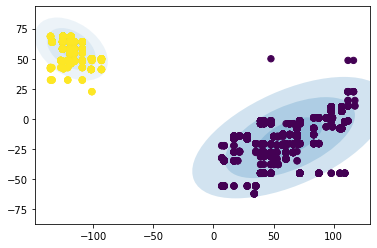

In [44]:
# Fit k=2 Gaussians to the TSNE reduced dimensional space in 2D

k = 2

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
       
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


Y2 = tsne_projections_Predicts_ARRAY
gmm_example = GaussianMixture(n_components=k).fit(Y2[:,:2])
gmm_labels = gmm_example.predict(Y2)
gmm_probs = gmm_example.predict_proba(Y2)
plot_gmm(gmm_example, Y2)